In [56]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

from collections import Counter

%matplotlib inline

In [57]:
# Updating stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ukarj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [152]:
# Reading the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [59]:
train_df.shape,test_df.shape

((2834, 6), (7, 4))

In [60]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [61]:
test_df.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [62]:
train_df.isnull().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

In [63]:
# Removing url_legal & licence columns from train_df as most of them are null
train_df.drop(['url_legal','license'],axis=1,inplace=True)
# Since we are removing these columns from training data we don't need it in testing data
test_df.drop(['url_legal','license'],axis=1,inplace=True)

In [64]:
train_df

,id,excerpt,target,standard_error
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...
2829,25ca8f498,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,Solids are shapes that you can actually touch....,-0.215279,0.514128


In [65]:
train_df.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


In [66]:
train_df['length'] = train_df['excerpt'].apply(len)

In [67]:
train_df.length.describe()

count    2834.000000
mean      971.732886
std       117.257578
min       669.000000
25%       885.000000
50%       971.000000
75%      1058.000000
max      1341.000000
Name: length, dtype: float64

Average length of excerpts is 971.73 <br>
minimum is 669 and maximum is 1341

- ## Text preprocessing

In [73]:
# Cleaning the data by removing stopwords, punctuations, etc.

In [74]:
def lower_it(text):
    '''Function to convert text to lower case'''
    return text.lower()

def remove_punctuation(text):
    '''Function to remove punctuations'''
    new_text = ''.join([i for i in text if i not in string.punctuation])
    return new_text

def remove_numbers(text):
    '''Functions to remove numbers'''
    new_text = ''.join([i for i in text if i not in string.digits])
    return new_text

def remove_stopwords(text):
    '''Function to remove stopwords from text'''
    stop_words = nltk.corpus.stopwords.words('english')
    new_text = ' '.join([i for i in text.split() if i not in stop_words])
    return new_text

In [75]:
# Applying these functions on the data
train_df['excerpt'] = train_df['excerpt'].apply(lambda x: lower_it(x))
train_df['excerpt'] = train_df['excerpt'].apply(lambda x: remove_punctuation(x))
train_df['excerpt'] = train_df['excerpt'].apply(lambda x: remove_numbers(x))
train_df['excerpt'] = train_df['excerpt'].apply(lambda x: remove_stopwords(x))

In [76]:
train_df['new_length'] = train_df['excerpt'].apply(len)

In [77]:
removed_word_len = train_df.length.sum()-train_df.new_length.sum()
print('Total {} stop words were removed from exerpts'.format(removed_word_len))

Total 1018579 stop words were removed from exerpts


In [78]:
# Plotting top 20 used words in excerpts
word_counter = Counter([word for text in train_df['excerpt'] for word in text.split()])

In [79]:
word_counter.most_common(20)

[('one', 1881),
 ('little', 1134),
 ('would', 1131),
 ('said', 1109),
 ('could', 905),
 ('time', 891),
 ('like', 798),
 ('two', 779),
 ('made', 770),
 ('people', 732),
 ('great', 696),
 ('many', 681),
 ('first', 669),
 ('called', 636),
 ('water', 631),
 ('day', 629),
 ('also', 608),
 ('came', 608),
 ('old', 597),
 ('went', 577)]

In [80]:
top_words = pd.DataFrame(word_counter.most_common(20),columns=['word','count'])

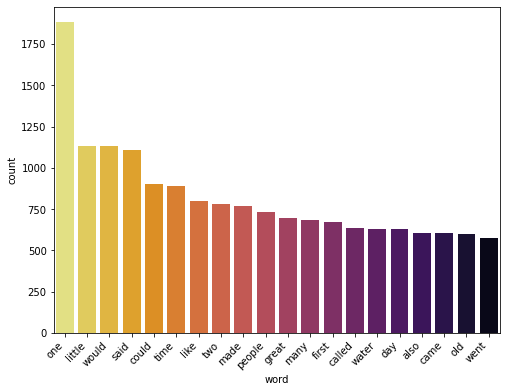

In [81]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_words,x='word',y='count',palette='inferno_r')
plt.xticks(rotation=45,ha='right')
plt.show()

In [82]:
train_df

,id,excerpt,target,standard_error,length,new_length
0,c12129c31,young people returned ballroom presented decid...,-0.340259,0.464009,992,604
1,85aa80a4c,dinner time mrs fayre somewhat silent eyes res...,-0.315372,0.480805,937,570
2,b69ac6792,roger predicted snow departed quickly came two...,-0.580118,0.476676,908,538
3,dd1000b26,outside palace great garden walled round fille...,-1.054013,0.450007,909,585
4,37c1b32fb,upon time three bears lived together house woo...,0.247197,0.510845,723,410
...,...,...,...,...,...,...
2829,25ca8f498,think dinosaurs lived picture see hot steamy s...,1.711390,0.646900,901,627
2830,2c26db523,solid solids usually hard molecules packed tog...,0.189476,0.535648,890,545
2831,cd19e2350,second state matter discuss liquid solids hard...,0.255209,0.483866,949,527
2832,15e2e9e7a,solids shapes actually touch three dimensions ...,-0.215279,0.514128,864,523


- ## Modeling

In [133]:
# Seperating the data from training data in features and target
X = train_df['excerpt']
Y = train_df['target']

In [134]:
c_vec = CountVectorizer()

In [135]:
X = c_vec.fit_transform(X).toarray()

In [142]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [145]:
# Splitting the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

In [146]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [147]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [148]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [149]:
y_pred_rfr = rfr.predict(x_test)
y_pred_gbr = gbr.predict(x_test)

In [150]:
print('Scores for RandomForestRegressor')
print('\tTraining score :{}'.format(np.sqrt(mean_squared_error(y_train,rfr.predict(x_train)))))
print('\tTesting score :{}'.format(np.sqrt(mean_squared_error(y_test,y_pred_rfr))))
print('Scores for GradientBoostingRegressor')
print('\tTraining score :{}'.format(np.sqrt(mean_squared_error(y_train,gbr.predict(x_train)))))
print('\tTesting score :{}'.format(np.sqrt(mean_squared_error(y_test,y_pred_gbr))))

Scores for RandomForestRegressor
	Training score :0.3155711110019309
	Testing score :0.8275135993906226
Scores for GradientBoostingRegressor
	Training score :0.7081187707174186
	Testing score :0.8436238306872804


We can see GradientBoostingRegressor is a better model.

- ## Predicting on test data

In [156]:
# processing test data
test_df['excerpt'] = test_df['excerpt'].apply(lambda x: lower_it(x))
test_df['excerpt'] = test_df['excerpt'].apply(lambda x: remove_punctuation(x))
test_df['excerpt'] = test_df['excerpt'].apply(lambda x: remove_numbers(x))
test_df['excerpt'] = test_df['excerpt'].apply(lambda x: remove_stopwords(x))

In [157]:
test_df

,id,excerpt
0,c0f722661,hope lay jacks promise would keep bright light...
1,f0953f0a5,dotty continued go mrs grays every night milk ...
2,0df072751,bright cheerful scene greeted eyes captain ray...
3,04caf4e0c,cell division process parent cell divides two ...
4,0e63f8bea,debugging process finding resolving defects pr...
5,12537fe78,explain transitivity let us look first totally...
6,965e592c0,milka john playing garden little sister playin...


In [159]:
test_x = test_df['excerpt']

In [160]:
test_x = c_vec.transform(test_x).toarray()
test_x = ss.transform(test_x)

In [162]:
gbr.predict(test_x)

array([-1.2881801 , -0.38699482, -0.64284677, -1.62466854, -1.48991695,
       -0.72961661, -0.58517809])

In [166]:
submission = test_df[['id']]

In [167]:
submission['target'] = gbr.predict(test_x)

In [168]:
submission

,id,target
0,c0f722661,-1.288180
1,f0953f0a5,-0.386995
2,0df072751,-0.642847
3,04caf4e0c,-1.624669
4,0e63f8bea,-1.489917
5,12537fe78,-0.729617
6,965e592c0,-0.585178


In [169]:
submission.to_csv('submission.csv')